In [22]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from openpyxl.styles.alignment import horizontal_alignments
import dataframe_image as dfi
from PIL import Image, ImageDraw, ImageFont

## Load and preprocess data

In [2]:
# Define converters to handle non-numeric values and convert Year to int
converters = {
    'Total Population, as of 1 July (thousands)': lambda x: pd.to_numeric(x, errors='coerce'),
    'Net Number of Migrants (thousands)': lambda x: pd.to_numeric(x, errors='coerce'),
    'Net Migration Rate (per 1,000 population)': lambda x: pd.to_numeric(x, errors='coerce')
}

# Read the Excel file and specify the converters
df = pd.read_excel(
    '../../data/wpp_2024.xlsx',
    skiprows=16,
    usecols=[
        'Region, subregion, country or area *',
        'Type',
        'Year',
        'Total Population, as of 1 July (thousands)',
        'Net Number of Migrants (thousands)',
        'Net Migration Rate (per 1,000 population)'
    ],
    converters=converters
)

In [3]:
df = df.rename(
    columns={'Region, subregion, country or area *': 'Country',
             'Total Population, as of 1 July (thousands)': 'Population',
            'Net Number of Migrants (thousands)': 'Net Migrants (thousands)',}
)

In [4]:
df.dtypes

Country                                       object
Type                                          object
Year                                         float64
Population                                   float64
Net Migrants (thousands)                     float64
Net Migration Rate (per 1,000 population)    float64
dtype: object

In [5]:
# Add Net migration rate as percentage of population
df['Net Migration Rate (%)'] = ((df['Net Migrants (thousands)'] / df['Population']) * 100).round(2)

In [6]:
df.columns

Index(['Country', 'Type', 'Year', 'Population', 'Net Migrants (thousands)',
       'Net Migration Rate (per 1,000 population)', 'Net Migration Rate (%)'],
      dtype='object')

## Rank by Negative Net Migration Rate (per 1,000 population) in 2023

In [7]:

df_2023_ranked = df.query('Year == 2023').sort_values(
    'Net Migration Rate (per 1,000 population)',ascending=True)

df_2023_ranked

Country          Type    Year  Population  \
17320  Saint Martin (French part)  Country/Area  2023.0      27.515   
20946            Marshall Islands  Country/Area  2023.0      38.827   
21464                Cook Islands  Country/Area  2023.0      14.222   
21908                      Tuvalu  Country/Area  2023.0       9.816   
21168    Northern Mariana Islands  Country/Area  2023.0      45.143   
...                           ...           ...     ...         ...   
11325        United Arab Emirates  Country/Area  2023.0   10642.081   
21760                     Tokelau  Country/Area  2023.0       2.397   
10881                        Oman  Country/Area  2023.0    5049.269   
11177        Syrian Arab Republic  Country/Area  2023.0   23594.623   
3777                  South Sudan  Country/Area  2023.0   11483.374   

       Net Migrants (thousands)  Net Migration Rate (per 1,000 population)  \
17320                    -1.697                                    -61.677   
20946                    -1.832                                    -47.184   
21464                    -0.558                                    -39.235   
21908                    -0.323                                    -32.907   
21168                    -1.321                                    -29.263   
...                         ...                                        ...   
11325                   300.004                                     28.190   
21760                     0.073                                     30.448   
10881                   156.285                                     30.952   
11177                   757.309                                     32.097   
3777                    455.000                                     39.622   

       Net Migration Rate (%)  
17320                   -6.17  
20946                   -4.72  
21464                   -3.92  
21908                   -3.29  
21168                   -2.93  
...                       ...  
11325                    2.82  
21760                    3.05  
10881                    3.10  
11177                    3.21  
3777                     3.96  

[297 rows x 7 columns]

In [8]:
# List of war-torn countries or in war-like conditions in 2023
to_remove_war_torn = [
    "Afghanistan", "Syrian Arab Republic", "Iraq", "Yemen", "Libya", "Somalia", "South Sudan", "Armenia", "Azerbaijan", "Kosovo (under UNSC res. 1244)", "Ukraine", "Sudan", "Russian Federation", "Lebanon", "State of Palestine", 
]

In [9]:
df_2023_ranked = df_2023_ranked[~df_2023_ranked['Country'].isin(to_remove_war_torn)]
df_2023_ranked

Country          Type    Year  Population  \
17320        Saint Martin (French part)  Country/Area  2023.0      27.515   
20946                  Marshall Islands  Country/Area  2023.0      38.827   
21464                      Cook Islands  Country/Area  2023.0      14.222   
21908                            Tuvalu  Country/Area  2023.0       9.816   
21168          Northern Mariana Islands  Country/Area  2023.0      45.143   
...                                 ...           ...     ...         ...   
4443                               Chad  Country/Area  2023.0   19319.064   
16062  Bonaire, Sint Eustatius and Saba  Country/Area  2023.0      29.898   
11325              United Arab Emirates  Country/Area  2023.0   10642.081   
21760                           Tokelau  Country/Area  2023.0       2.397   
10881                              Oman  Country/Area  2023.0    5049.269   

       Net Migrants (thousands)  Net Migration Rate (per 1,000 population)  \
17320                    -1.697                                    -61.677   
20946                    -1.832                                    -47.184   
21464                    -0.558                                    -39.235   
21908                    -0.323                                    -32.907   
21168                    -1.321                                    -29.263   
...                         ...                                        ...   
4443                    496.830                                     25.717   
16062                     0.820                                     27.426   
11325                   300.004                                     28.190   
21760                     0.073                                     30.448   
10881                   156.285                                     30.952   

       Net Migration Rate (%)  
17320                   -6.17  
20946                   -4.72  
21464                   -3.92  
21908                   -3.29  
21168                   -2.93  
...                       ...  
4443                     2.57  
16062                    2.74  
11325                    2.82  
21760                    3.05  
10881                    3.10  

[282 rows x 7 columns]

In [10]:
# Keep only Country/Area type with population greater than 50 thousand
df_2023_ranked = df_2023_ranked.query('Type == "Country/Area" and Population > 50').reset_index(drop=True)
df_2023_ranked

Country          Type    Year  Population  \
0                          Tonga  Country/Area  2023.0     104.597   
1                         Greece  Country/Area  2023.0   10242.908   
2                          Nepal  Country/Area  2023.0   29694.614   
3                          Samoa  Country/Area  2023.0     216.663   
4    Micronesia (Fed. States of)  Country/Area  2023.0     112.630   
..                           ...           ...     ...         ...   
190                    Lithuania  Country/Area  2023.0    2854.099   
191                   Montenegro  Country/Area  2023.0     633.552   
192                         Chad  Country/Area  2023.0   19319.064   
193         United Arab Emirates  Country/Area  2023.0   10642.081   
194                         Oman  Country/Area  2023.0    5049.269   

     Net Migrants (thousands)  Net Migration Rate (per 1,000 population)  \
0                      -2.173                                    -20.775   
1                    -159.430                                    -15.565   
2                    -409.782                                    -13.800   
3                      -2.810                                    -12.969   
4                      -1.134                                    -10.069   
..                        ...                                        ...   
190                    44.935                                     15.744   
191                    12.000                                     18.941   
192                   496.830                                     25.717   
193                   300.004                                     28.190   
194                   156.285                                     30.952   

     Net Migration Rate (%)  
0                     -2.08  
1                     -1.56  
2                     -1.38  
3                     -1.30  
4                     -1.01  
..                      ...  
190                    1.57  
191                    1.89  
192                    2.57  
193                    2.82  
194                    3.10  

[195 rows x 7 columns]

In [11]:
# Country/Area with population greater than 125 thousand
top_20 = df_2023_ranked.query(
    'Type == "Country/Area" and Population > 125'
    ).drop(
        columns=['Type', 'Year']
    ).reset_index(drop=True).head(20)

top_20.index = top_20.index + 1
# top_20['rank'] = top_20.index

In [18]:
styled_top_20 = top_20.style.set_properties(**{'text-align': 'center'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]}]
)

In [19]:
styled_top_20

In [26]:
dfi.export(styled_top_20, 'top20_2023.png', table_conversion="selenium")

In [55]:
# Open the image and add the title and subtitle
image = Image.open('top20_2023.png')
draw = ImageDraw.Draw(image)
title = "Top 20 countries in Negative Net Migration as a percentage of the population, 2023"
subtitle = "source: United Nations Population Prospects 2024, excluding war-torn areas and small nation states."

# Define font and size (you may need to adjust the path to the font file)
font_title = ImageFont.truetype("arial.ttf", 24)
font_subtitle = ImageFont.truetype("arial.ttf", 14)

# Calculate the width and height of the title and subtitle to center them
title_bbox = draw.textbbox((0, 0), title, font=font_title)
title_width = title_bbox[2] - title_bbox[0]
title_height = title_bbox[3] - title_bbox[1]

subtitle_bbox = draw.textbbox((0, 0), subtitle, font=font_subtitle)
subtitle_width = subtitle_bbox[2] - subtitle_bbox[0]
subtitle_height = subtitle_bbox[3] - subtitle_bbox[1]

image_width, image_height = image.size
x_title = (image_width - title_width) / 2
x_subtitle = 10  # (image_width - subtitle_width) / 2  # Aling left instead of center

# Create a new image with space for the title, table, and subtitle
new_image_height = image_height + title_height + subtitle_height + 45  # Add some padding
new_image = Image.new('RGB', (image_width, new_image_height), 'white')
new_draw = ImageDraw.Draw(new_image)

# Add the title to the new image
new_draw.text((x_title, 10), title, font=font_title, fill="black")

# Paste the original image below the title
new_image.paste(image, (0, title_height + 20))

# Add the subtitle below the table
new_draw.text((x_subtitle, title_height + image_height + 35), subtitle, font=font_subtitle, fill="black")

# Save the new image with the title, table, and subtitle
new_image.save('top20_in_negative_migration_2023.png')

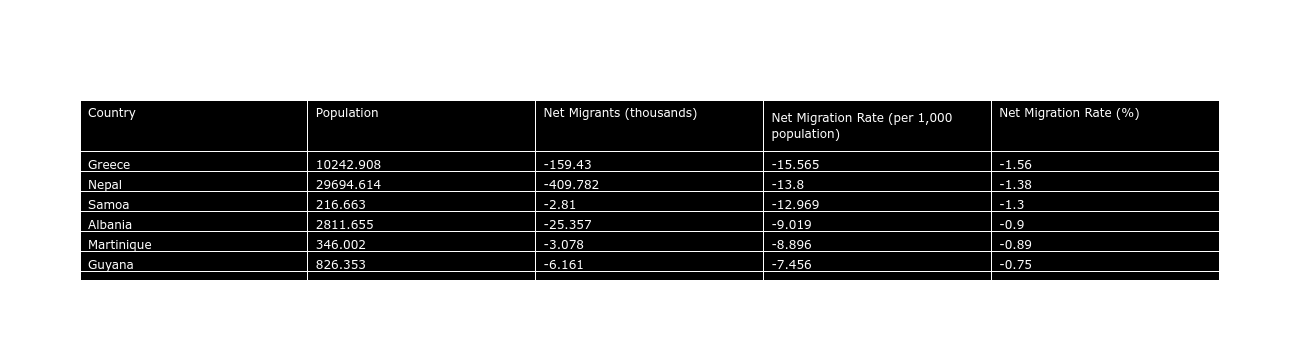

In [57]:
# Alternative table format
table_top_20 = go.Figure(data=[go.Table(
    header=dict(values=list(top_20.columns),
                #=[f"{col}" for col in top_20.columns],  # Add line breaks for vertical centering
                fill_color='black',  # Set header background color to black
                align='left',  # Align header text to the center horizontally
                font=dict(color='white')),  # Set header font color to white
    cells=dict(values=[top_20[col] for col in top_20.columns],
               fill_color='black',  # Set cells background color to black
               align='left',  # Align cells text to the left
               font=dict(color='white'))  # Set cells font color to white
)])

# Save the interactive table as a PNG file
table_top_20.write_image('top_20_table.png')

# Display the interactive table in a Jupyter Notebook (optional)
table_top_20.show()

## Examine the long-term trend for Greece

In [58]:
# Filter the DataFrame for rows where the area is Greece and the Year is between 1989 and 2023
df_greece_filtered = df.query('Country == "Greece" and 1950 <= Year <= 2023')

df_greece_table = df_greece_filtered[
    ['Country', 'Year', 'Net Migrants (thousands)', 'Net Migration Rate (per 1,000 population)']]

df_greece_table

Country    Year  Net Migrants (thousands)  \
13842  Greece  1950.0                   -22.206   
13843  Greece  1951.0                   -22.206   
13844  Greece  1952.0                   -22.141   
13845  Greece  1953.0                   -19.257   
13846  Greece  1954.0                   -21.467   
...       ...     ...                       ...   
13911  Greece  2019.0                    36.762   
13912  Greece  2020.0                     6.353   
13913  Greece  2021.0                  -160.277   
13914  Greece  2022.0                   -53.997   
13915  Greece  2023.0                  -159.430   

       Net Migration Rate (per 1,000 population)  
13842                                     -2.902  
13843                                     -2.879  
13844                                     -2.848  
13845                                     -2.456  
13846                                     -2.714  
...                                          ...  
13911                                      3.430  
13912                                      0.594  
13913                                    -15.150  
13914                                     -5.186  
13915                                    -15.565  

[74 rows x 4 columns]

In [59]:
# Last 36 years
df_greece_table.tail(36)

Country    Year  Net Migrants (thousands)  \
13880  Greece  1988.0                    20.557   
13881  Greece  1989.0                    18.862   
13882  Greece  1990.0                    26.294   
13883  Greece  1991.0                    37.917   
13884  Greece  1992.0                    41.000   
13885  Greece  1993.0                    39.829   
13886  Greece  1994.0                    42.897   
13887  Greece  1995.0                    42.674   
13888  Greece  1996.0                    43.444   
13889  Greece  1997.0                    45.671   
13890  Greece  1998.0                    47.856   
13891  Greece  1999.0                    49.930   
13892  Greece  2000.0                    54.661   
13893  Greece  2001.0                    60.387   
13894  Greece  2002.0                    25.692   
13895  Greece  2003.0                    25.323   
13896  Greece  2004.0                    29.039   
13897  Greece  2005.0                    33.297   
13898  Greece  2006.0                    27.621   
13899  Greece  2007.0                    25.400   
13900  Greece  2008.0                    27.081   
13901  Greece  2009.0                    18.182   
13902  Greece  2010.0                     2.001   
13903  Greece  2011.0                   -31.786   
13904  Greece  2012.0                   -65.364   
13905  Greece  2013.0                   -59.323   
13906  Greece  2014.0                   -46.678   
13907  Greece  2015.0                   -43.462   
13908  Greece  2016.0                    10.484   
13909  Greece  2017.0                    10.483   
13910  Greece  2018.0                    17.938   
13911  Greece  2019.0                    36.762   
13912  Greece  2020.0                     6.353   
13913  Greece  2021.0                  -160.277   
13914  Greece  2022.0                   -53.997   
13915  Greece  2023.0                  -159.430   

       Net Migration Rate (per 1,000 population)  
13880                                      2.020  
13881                                      1.846  
13882                                      2.563  
13883                                      3.679  
13884                                      3.958  
13885                                      3.825  
13886                                      4.099  
13887                                      4.057  
13888                                      4.110  
13889                                      4.300  
13890                                      4.483  
13891                                      4.654  
13892                                      5.069  
13893                                      5.569  
13894                                      2.359  
13895                                      2.319  
13896                                      2.653  
13897                                      3.032  
13898                                      2.507  
13899                                      2.300  
13900                                      2.445  
13901                                      1.637  
13902                                      0.180  
13903                                     -2.861  
13904                                     -5.916  
13905                                     -5.409  
13906                                     -4.285  
13907                                     -4.016  
13908                                      0.973  
13909                                      0.975  
13910                                      1.672  
13911                                      3.430  
13912                                      0.594  
13913                                    -15.150  
13914                                     -5.186  
13915                                    -15.565

In [61]:
# Sum the Net Number of Migrants (thousands) for greece from 1950 to 2023
df_greece_filtered['Net Migrants (thousands)'].sum()

-145.938

In [62]:
# sum net number of migrants of Greece from 1990 to 2023    
df_greece_filtered.query('Year >= 1990')['Net Migrants (thousands)'].sum()

207.899

In [63]:
# sum net number of migrants of Greece from 1990 to 2023    
df_greece_filtered.query('Year >= 2010')['Net Migrants (thousands)'].sum()

-536.296

In [95]:
df_greece_filtered.columns

Index(['Country', 'Type', 'Year', 'Population', 'Net Migrants (thousands)',
       'Net Migration Rate (per 1,000 population)', 'Net Migration Rate (%)'],
      dtype='object')

In [96]:
df_greece_filtered.query('Year >= 2010')['Net Migration Rate (%)'].sum()

-5.050000000000001

In [97]:
df_greece_filtered.query('Year >= 2020')['Net Migration Rate (%)'].sum()

-3.5300000000000002

In [ ]:
# sum net number of migrants of Greece from 1990 to 2023 

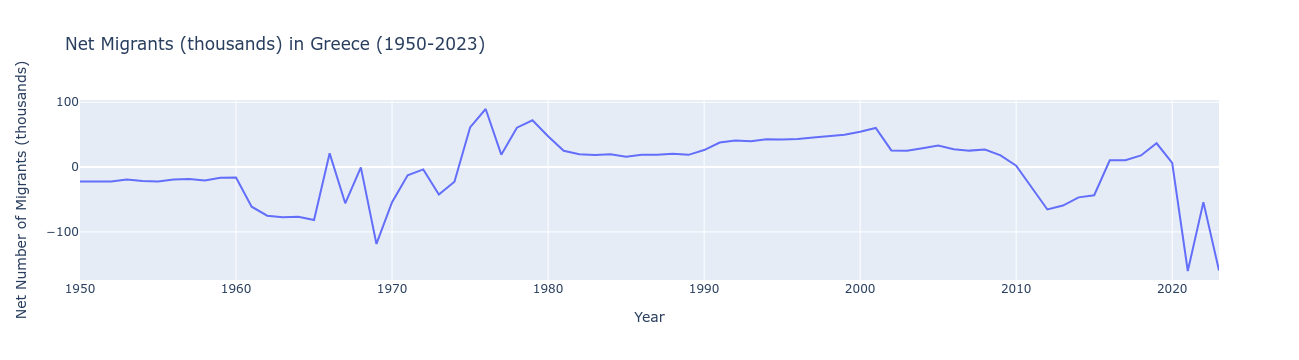

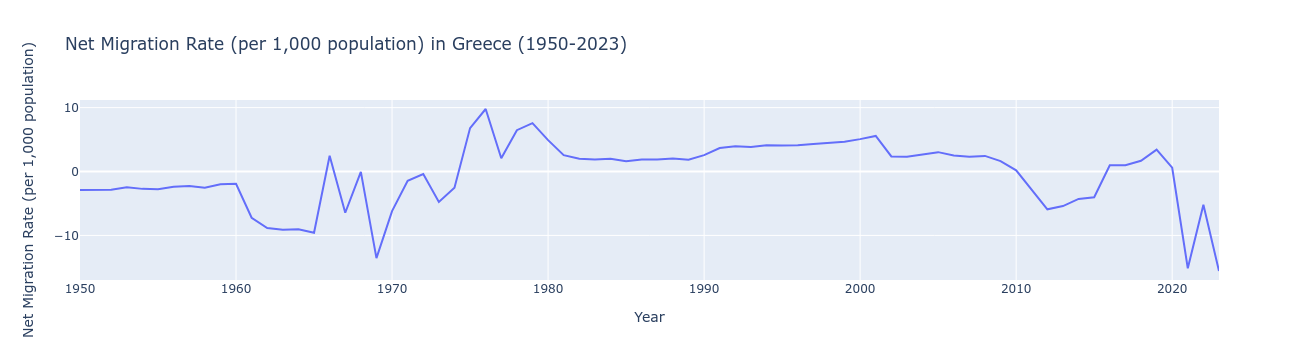

In [65]:
# Filter the DataFrame for rows where the area is Greece and the Year is between 1950 and 2023
df_greece_filtered = df.query('Country == "Greece" and 1950 <= Year <= 2023')

# Create the first chart for 'Net Number of Migrants (thousands)'
fig1 = px.line(df_greece_filtered, x='Year', y='Net Migrants (thousands)',
               title='Net Migrants (thousands) in Greece (1950-2023)',
               labels={'Net Migrants (thousands)': 'Net Number of Migrants (thousands)'})

# Show the first chart
fig1.show()

# Create the second chart for 'Net Migration Rate'
fig2 = px.line(df_greece_filtered, x='Year', y='Net Migration Rate (per 1,000 population)',
               title='Net Migration Rate (per 1,000 population) in Greece (1950-2023)',
               labels={'Net Migration Rate (per 1,000 population)': 'Net Migration Rate (per 1,000 population)'})

# Show the second chart
fig2.show()

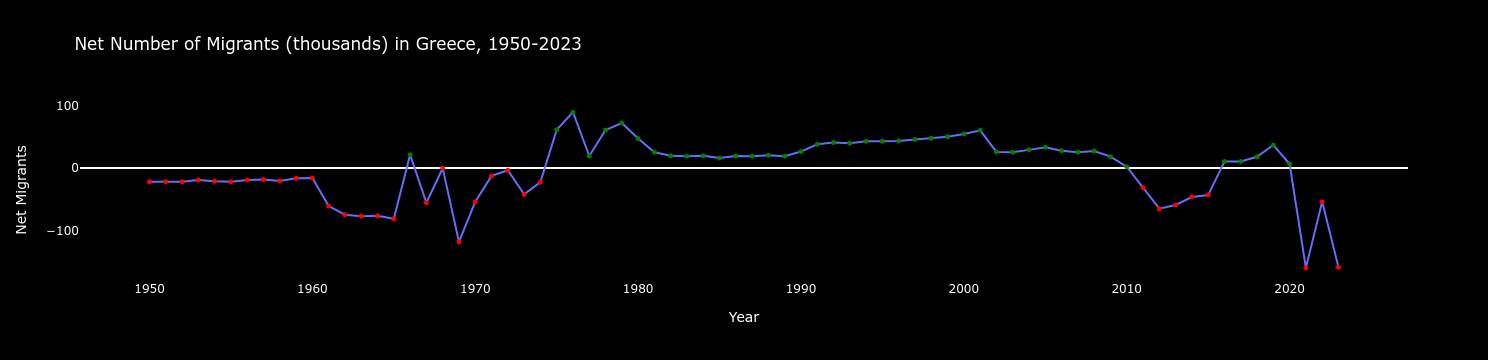

In [125]:

# Filter the DataFrame for rows where the area is Greece and the Year is between 1950 and 2023
df_greece_filtered = df.query('Country == "Greece" and 1950 <= Year <= 2023')

# Create the first chart for 'Net Number of Migrants (thousands)'
fig1 = go.Figure()

# Add points above zero
fig1.add_trace(go.Scatter(
    x=df_greece_filtered['Year'],
    y=df_greece_filtered['Net Migrants (thousands)'],
    mode='lines+markers',
    marker=dict(color=['green' if y > 0 else 'red' for y in df_greece_filtered['Net Migrants (thousands)']],
                size=5,
                line=dict(color='#283442'))
))

# Add a horizontal line at y=0
fig1.add_shape(
    type='line',
    x0=df_greece_filtered['Year'].min(),
    x1=df_greece_filtered['Year'].max()+2,
    y0=0,
    y1=0,
    line=dict(
        color='White',
        width=0.15
    )
)

# Update layout
fig1.update_layout(
    title='Net Number of Migrants (thousands) in Greece, 1950-2023',
    xaxis_title='Year',
    yaxis_title='Net Migrants',
    xaxis=dict(showgrid=False),  # Remove x-axis grid lines
    yaxis=dict(showgrid=False),   # Remove y-axis grid lines
    plot_bgcolor='black',        # Set plot background color to black
    paper_bgcolor='black',       # Set paper background color to black
    font=dict(color='white')     # Set font color to white
)

# Show the first chart
fig1.show()

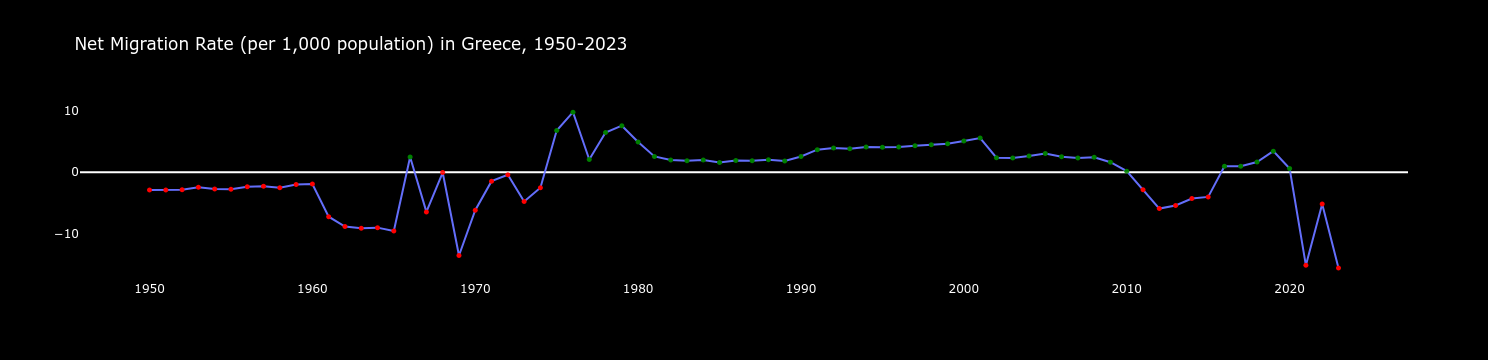

In [128]:
# Create the second chart for 'Net Migration Rate'
fig2 = go.Figure()

# Add points above zero
fig2.add_trace(go.Scatter(
    x=df_greece_filtered['Year'],
    y=df_greece_filtered['Net Migration Rate (per 1,000 population)'],
    mode='lines+markers',
    marker=dict(color=['green' if y > 0 else 'red' for y in df_greece_filtered['Net Migrants (thousands)']],
                size=5,
                line=dict(color='#283442'))
))

# Add a horizontal line at y=0
fig2.add_shape(
    type='line',
    x0=df_greece_filtered['Year'].min(),
    x1=df_greece_filtered['Year'].max(),
    y0=0,
    y1=0,
    line=dict(
        color='White',
        width=0.25
    )
)

# Update layout
fig2.update_layout(
    title='Net Migration Rate (per 1,000 population) in Greece, 1950-2023',
    # xaxis_title='Year',
    xaxis=dict(showgrid=False),  # Remove x-axis grid lines
    yaxis=dict(showgrid=False),   # Remove y-axis grid lines
    plot_bgcolor='black',        # Set plot background color to black
    paper_bgcolor='black',       # Set paper background color to black
    font=dict(color='white')     # Set font color to white
)

# Show the second chart
fig2.show()

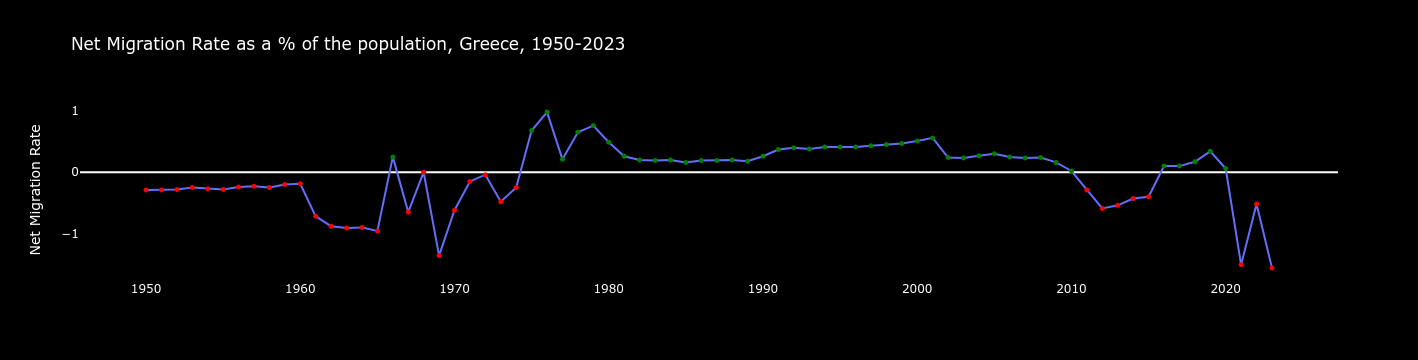

In [145]:
# Create the third chart for 'Net Migration Rate as % of population'
fig3 = go.Figure()

# Add points above zero
fig3.add_trace(go.Scatter(
    x=df_greece_filtered['Year'],
    y=df_greece_filtered['Net Migration Rate (%)'],
    mode='lines+markers',
    marker=dict(color=['green' if y > 0 else 'red' for y in df_greece_filtered['Net Migrants (thousands)']],
                size=5,
                line=dict(color='#283442'))
))

# Add a horizontal line at y=0
fig3.add_shape(
    type='line',
    x0=df_greece_filtered['Year'].min()+5,
    x1=df_greece_filtered['Year'].max(),
    y0=0,
    y1=0,
    line=dict(
        width=0.01,
        color='White'
    )
)

# Update layout
fig3.update_layout(
    title='Net Migration Rate as a % of the population, Greece, 1950-2023',
    # xaxis_title='Year',
    yaxis_title='Net Migration Rate',
    xaxis=dict(showgrid=False),  # Remove x-axis grid lines
    yaxis=dict(showgrid=False),   # Remove y-axis grid lines
    plot_bgcolor='black',        # Set plot background color to black
    paper_bgcolor='black',       # Set paper background color to black
    font=dict(color='white')     # Set font color to white
)

# Show the second chart
fig3.show()

In [146]:
# Save the interactive plot as an HTML file
fig3.write_html('net_migration_rate_greece_1950_2023.html')

#### Alternative plots

In [72]:
# Extract theme colors from the figure
theme_colors = {
    'background_color': fig2.layout.template.layout.paper_bgcolor,
    'plot_background_color': fig2.layout.template.layout.plot_bgcolor,
    'grid_color': fig2.layout.template.layout.xaxis.gridcolor,
    'font_color': fig2.layout.template.layout.font.color,
    'axis_line_color': fig2.layout.template.layout.xaxis.linecolor
}

print(theme_colors)

{'background_color': 'white', 'plot_background_color': '#E5ECF6', 'grid_color': 'white', 'font_color': '#2a3f5f', 'axis_line_color': 'white'}


In [73]:

# Extract grid colors from the figure
xaxis_grid_color = fig2.layout.xaxis.gridcolor
yaxis_grid_color = fig2.layout.yaxis.gridcolor

print(f"X-axis grid color: {xaxis_grid_color}")
print(f"Y-axis grid color: {yaxis_grid_color}")

X-axis grid color: None
Y-axis grid color: None


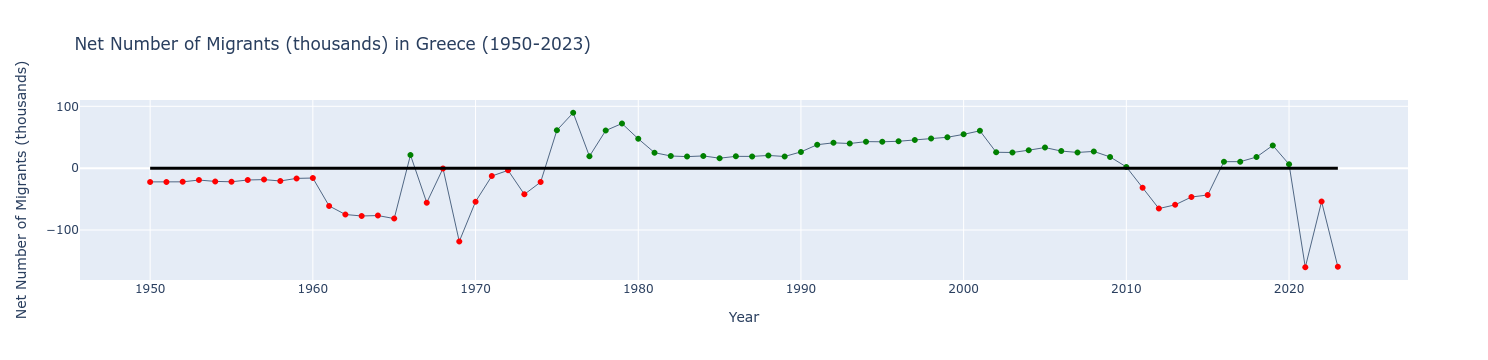

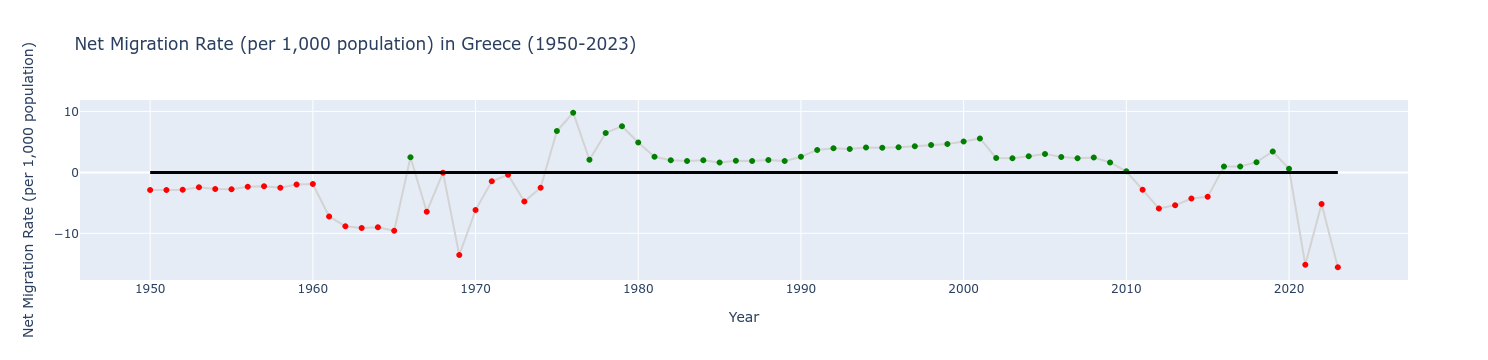

In [101]:
# Filter the DataFrame for rows where the area is Greece and the Year is between 1950 and 2023
df_greece_filtered = df.query('Country == "Greece" and 1950 <= Year <= 2023')

# Create the first chart for 'Net Number of Migrants (thousands)'
fig1 = go.Figure()

# Add points above zero
fig1.add_trace(go.Scatter(
    x=df_greece_filtered['Year'],
    y=df_greece_filtered['Net Migrants (thousands)'],
    mode='lines+markers',
    marker=dict(color=['green' if y > 0 else 'red' for y in df_greece_filtered['Net Migrants (thousands)']]),
    line=dict(color='#506784',
              width=1)
))

# Add a horizontal line at y=0
fig1.add_shape(
    type='line',
    x0=df_greece_filtered['Year'].min(),
    x1=df_greece_filtered['Year'].max(),
    y0=0,
    y1=0,
    line=dict(
        color='Black',
        width=3  # Three times thicker than the default grid lines
    )
)

# Update layout
fig1.update_layout(
    title='Net Number of Migrants (thousands) in Greece (1950-2023)',
    xaxis_title='Year',
    yaxis_title='Net Number of Migrants (thousands)'
)

# Show the first chart
fig1.show()

# Create the second chart for 'Net Migration Rate'
fig2 = go.Figure()

# Add points above zero
fig2.add_trace(go.Scatter(
    x=df_greece_filtered['Year'],
    y=df_greece_filtered['Net Migration Rate (per 1,000 population)'],
    mode='lines+markers',
    marker=dict(color=['green' if y > 0 else 'red' for y in df_greece_filtered['Net Migration Rate (per 1,000 population)']]),
    line=dict(color='lightgrey')  # Set line color to match grid color
))

# Add a horizontal line at y=0
fig2.add_shape(
    type='line',
    x0=df_greece_filtered['Year'].min(),
    x1=df_greece_filtered['Year'].max(),
    y0=0,
    y1=0,
    line=dict(
        color='Black',
        width=3  # Three times thicker than the default grid lines
    )
)

# Update layout
fig2.update_layout(
    title='Net Migration Rate (per 1,000 population) in Greece (1950-2023)',
    xaxis_title='Year',
    yaxis_title='Net Migration Rate (per 1,000 population)'
)

# Show the second chart
fig2.show()

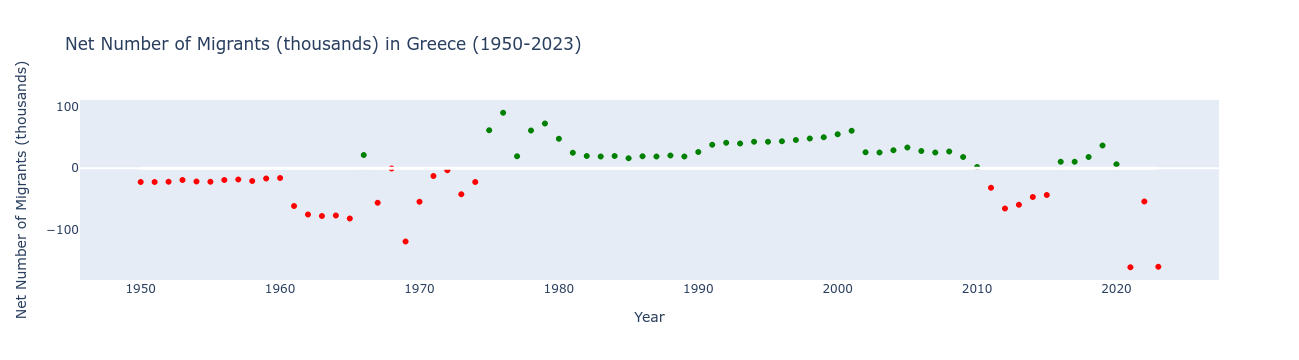

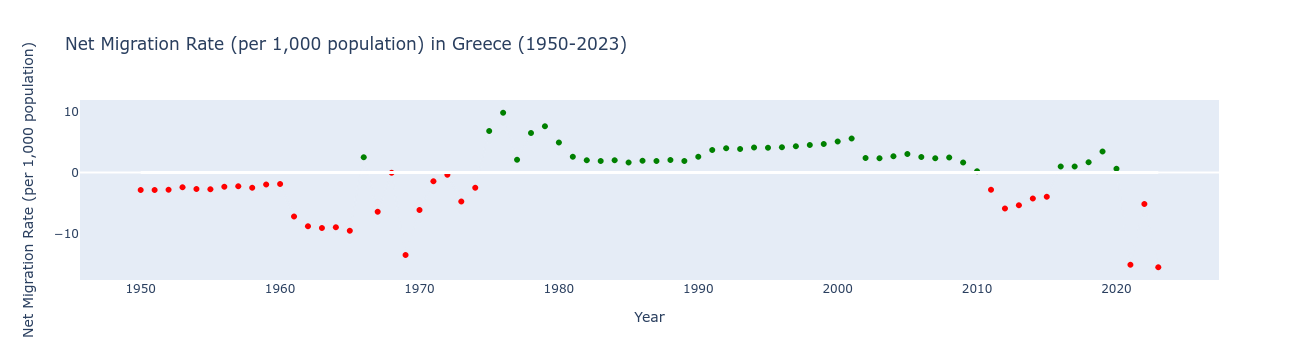

In [87]:
import pandas as pd
import plotly.graph_objects as go

# Filter the DataFrame for rows where the area is Greece and the Year is between 1950 and 2023
df_greece_filtered = df.query('Country == "Greece" and 1950 <= Year <= 2023')

# Create the first chart for 'Net Number of Migrants (thousands)'
fig1 = go.Figure()

# Add points above zero
fig1.add_trace(go.Scatter(
    x=df_greece_filtered['Year'],
    y=df_greece_filtered['Net Migrants (thousands)'],
    mode='lines+markers',
    marker=dict(color=['green' if y > 0 else 'red' for y in df_greece_filtered['Net Migrants (thousands)']]),
    line=dict(color='#e5ecf6')  # Set line color to match grid color
))

# Add a horizontal line at y=0
fig1.add_shape(
    type='line',
    x0=df_greece_filtered['Year'].min(),
    x1=df_greece_filtered['Year'].max(),
    y0=0,
    y1=0,
    line=dict(
        color='white',  # Set horizontal line color to white
        width=3  # Three times thicker than the default grid lines
    )
)

# Update layout
fig1.update_layout(
    title='Net Number of Migrants (thousands) in Greece (1950-2023)',
    xaxis_title='Year',
    yaxis_title='Net Number of Migrants (thousands)',
    xaxis=dict(showgrid=False),  # Remove x-axis grid lines
    yaxis=dict(showgrid=False)   # Remove y-axis grid lines
)

# Show the first chart
fig1.show()

# Create the second chart for 'Net Migration Rate'
fig2 = go.Figure()

# Add points above zero
fig2.add_trace(go.Scatter(
    x=df_greece_filtered['Year'],
    y=df_greece_filtered['Net Migration Rate (per 1,000 population)'],
    mode='lines+markers',
    marker=dict(color=['green' if y > 0 else 'red' for y in df_greece_filtered['Net Migration Rate (per 1,000 population)']]),
    line=dict(color='#e5ecf6')  # Set line color to match grid color
))

# Add a horizontal line at y=0
fig2.add_shape(
    type='line',
    x0=df_greece_filtered['Year'].min(),
    x1=df_greece_filtered['Year'].max(),
    y0=0,
    y1=0,
    line=dict(
        color='white',  # Set horizontal line color to white
        width=3  # Three times thicker than the default grid lines
    )
)

# Update layout
fig2.update_layout(
    title='Net Migration Rate (per 1,000 population) in Greece (1950-2023)',
    xaxis_title='Year',
    yaxis_title='Net Migration Rate (per 1,000 population)',
    xaxis=dict(showgrid=False),  # Remove x-axis grid lines
    yaxis=dict(showgrid=False)   # Remove y-axis grid lines
)

# Show the second chart
fig2.show()

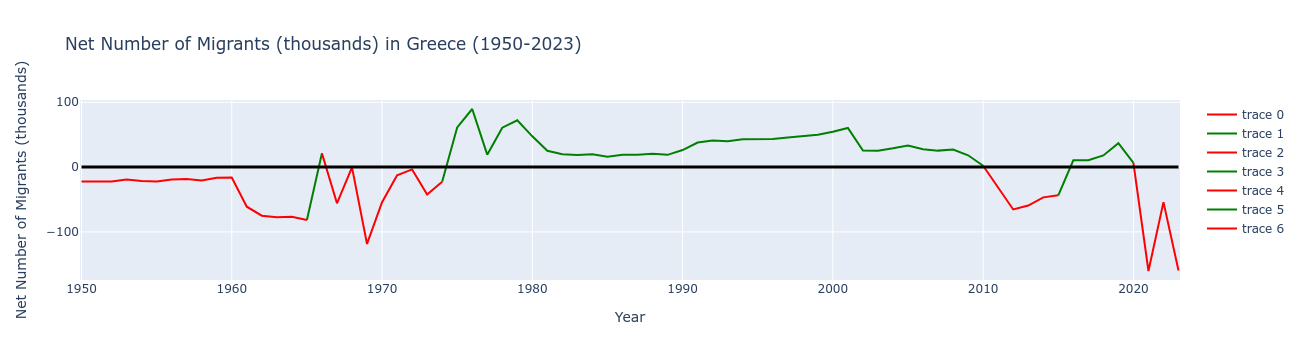

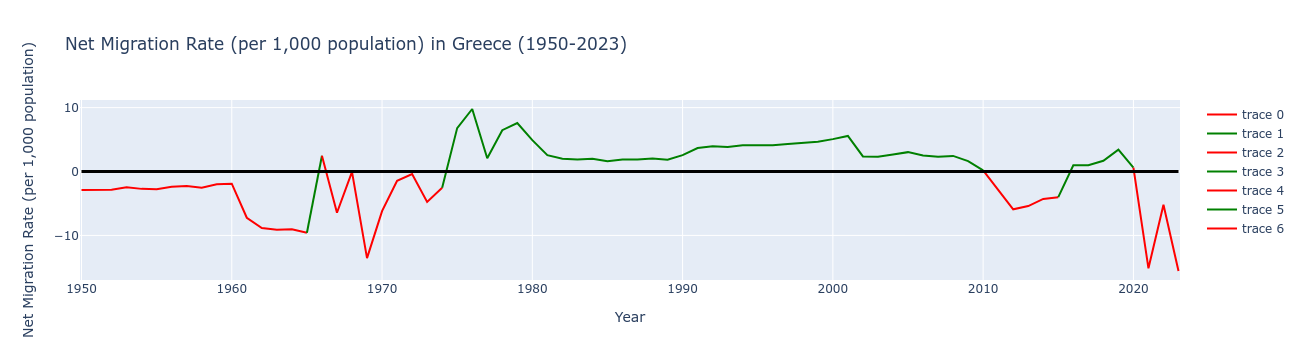

In [88]:
# Filter the DataFrame for rows where the area is Greece and the Year is between 1950 and 2023
df_greece_filtered = df.query('Country == "Greece" and 1950 <= Year <= 2023')

def create_segments(df, y_column):
    segments = []
    current_segment = {'x': [], 'y': [], 'color': 'green' if df[y_column].iloc[0] > 0 else 'red'}
    
    for i in range(len(df)):
        current_y = df[y_column].iloc[i]
        current_segment['x'].append(df['Year'].iloc[i])
        current_segment['y'].append(current_y)
        
        if i < len(df) - 1:
            next_y = df[y_column].iloc[i + 1]
            if (current_y > 0 and next_y <= 0) or (current_y <= 0 and next_y > 0):
                segments.append(current_segment)
                current_segment = {'x': [df['Year'].iloc[i]], 'y': [current_y], 'color': 'green' if next_y > 0 else 'red'}
    
    segments.append(current_segment)
    return segments

# Create the first chart for 'Net Number of Migrants (thousands)'
fig1 = go.Figure()

segments = create_segments(df_greece_filtered, 'Net Migrants (thousands)')
for segment in segments:
    fig1.add_trace(go.Scatter(
        x=segment['x'],
        y=segment['y'],
        mode='lines',
        line=dict(color=segment['color'])
    ))

# Add a horizontal line at y=0
fig1.add_shape(
    type='line',
    x0=df_greece_filtered['Year'].min(),
    x1=df_greece_filtered['Year'].max(),
    y0=0,
    y1=0,
    line=dict(
        color='Black',
        width=3  # Three times thicker than the default grid lines
    )
)

# Update layout
fig1.update_layout(
    title='Net Number of Migrants (thousands) in Greece (1950-2023)',
    xaxis_title='Year',
    yaxis_title='Net Number of Migrants (thousands)'
)

# Show the first chart
fig1.show()

# Create the second chart for 'Net Migration Rate'
fig2 = go.Figure()

segments = create_segments(df_greece_filtered, 'Net Migration Rate (per 1,000 population)')
for segment in segments:
    fig2.add_trace(go.Scatter(
        x=segment['x'],
        y=segment['y'],
        mode='lines',
        line=dict(color=segment['color'])
    ))

# Add a horizontal line at y=0
fig2.add_shape(
    type='line',
    x0=df_greece_filtered['Year'].min(),
    x1=df_greece_filtered['Year'].max(),
    y0=0,
    y1=0,
    line=dict(
        color='Black',
        width=3  # Three times thicker than the default grid lines
    )
)

# Update layout
fig2.update_layout(
    title='Net Migration Rate (per 1,000 population) in Greece (1950-2023)',
    xaxis_title='Year',
    yaxis_title='Net Migration Rate (per 1,000 population)'
)

# Show the second chart
fig2.show()

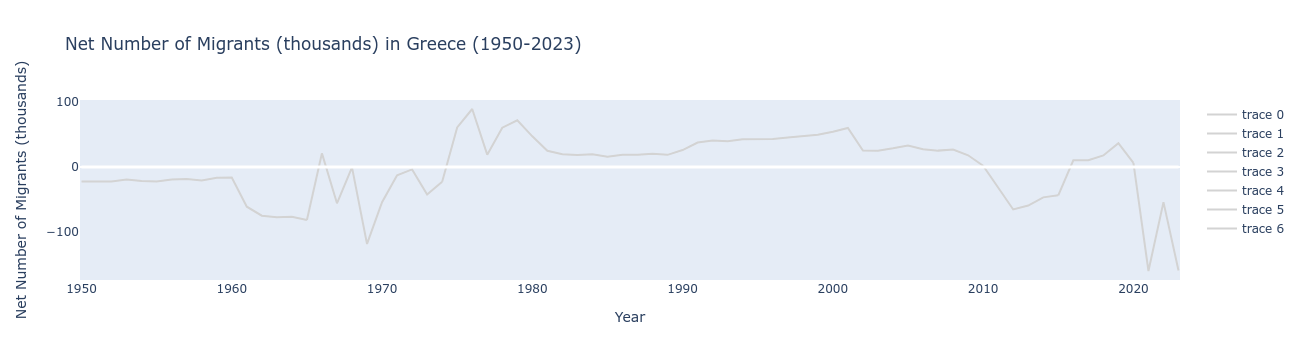

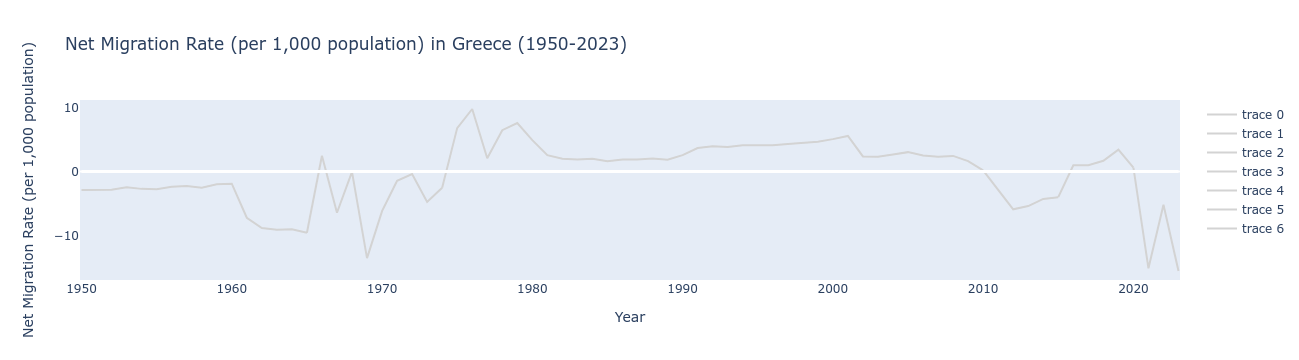

In [89]:

# Filter the DataFrame for rows where the area is Greece and the Year is between 1950 and 2023
df_greece_filtered = df.query('Country == "Greece" and 1950 <= Year <= 2023')

def create_segments(df, y_column):
    segments = []
    current_segment = {'x': [], 'y': [], 'color': 'green' if df[y_column].iloc[0] > 0 else 'red'}

    for i in range(len(df)):
        current_y = df[y_column].iloc[i]
        current_segment['x'].append(df['Year'].iloc[i])
        current_segment['y'].append(current_y)

        if i < len(df) - 1:
            next_y = df[y_column].iloc[i + 1]
            if (current_y > 0 and next_y <= 0) or (current_y <= 0 and next_y > 0):
                segments.append(current_segment)
                current_segment = {'x': [df['Year'].iloc[i]], 'y': [current_y], 'color': 'green' if next_y > 0 else 'red'}

    segments.append(current_segment)
    return segments

# Create the first chart for 'Net Number of Migrants (thousands)'
fig1 = go.Figure()

segments = create_segments(df_greece_filtered, 'Net Migrants (thousands)')
for segment in segments:
    fig1.add_trace(go.Scatter(
        x=segment['x'],
        y=segment['y'],
        mode='lines',
        line=dict(color='lightgrey')  # Set line color to match grid color
    ))

# Add a horizontal line at y=0
fig1.add_shape(
    type='line',
    x0=df_greece_filtered['Year'].min(),
    x1=df_greece_filtered['Year'].max(),
    y0=0,
    y1=0,
    line=dict(
        color='white',  # Set horizontal line color to white
        width=3  # Three times thicker than the default grid lines
    )
)

# Update layout to remove grid lines
fig1.update_layout(
    title='Net Number of Migrants (thousands) in Greece (1950-2023)',
    xaxis_title='Year',
    yaxis_title='Net Number of Migrants (thousands)',
    xaxis=dict(showgrid=False),  # Remove x-axis grid lines
    yaxis=dict(showgrid=False)   # Remove y-axis grid lines
)

# Show the first chart
fig1.show()

# Create the second chart for 'Net Migration Rate'
fig2 = go.Figure()

segments = create_segments(df_greece_filtered, 'Net Migration Rate (per 1,000 population)')
for segment in segments:
    fig2.add_trace(go.Scatter(
        x=segment['x'],
        y=segment['y'],
        mode='lines',
        line=dict(color='lightgrey')  # Set line color to match grid color
    ))

# Add a horizontal line at y=0
fig2.add_shape(
    type='line',
    x0=df_greece_filtered['Year'].min(),
    x1=df_greece_filtered['Year'].max(),
    y0=0,
    y1=0,
    line=dict(
        color='white',  # Set horizontal line color to white
        width=3  # Three times thicker than the default grid lines
    )
)

# Update layout to remove grid lines
fig2.update_layout(
    title='Net Migration Rate (per 1,000 population) in Greece (1950-2023)',
    xaxis_title='Year',
    yaxis_title='Net Migration Rate (per 1,000 population)',
    xaxis=dict(showgrid=False),  # Remove x-axis grid lines
    yaxis=dict(showgrid=False)   # Remove y-axis grid lines
)

# Show the second chart
fig2.show()